# Analysis of heterogeneous ABM - NO NETWORK

Assumes a well-mixed heterogeneous population in which agents communicate and observe behaviour of all other agents.

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.sample import sobol as sobol_sample
from SALib.analyze import sobol as sobol_analyze
from SALib.test_functions import Ishigami
import random

In [2]:
#from model import ConsumatModel
from model_heterogeneous import ConsumatModel

In [3]:
#Import KDE models

kde_modeks = {
    'ccrdprs': joblib.load('/Applications/UNI/Thesis/saved_data/kde_ccrdprs.pkl'),
    'gvsrdcc': joblib.load('/Applications/UNI/Thesis/saved_data/kde_gvsrdcc.pkl'),
    'hincfel': joblib.load('/Applications/UNI/Thesis/saved_data/kde_hincfel.pkl'),
    'impenv': joblib.load('/Applications/UNI/Thesis/saved_data/kde_impenv.pkl'),
    'impfree': joblib.load('/Applications/UNI/Thesis/saved_data/kde_impfree.pkl'),
    'imprich': joblib.load('/Applications/UNI/Thesis/saved_data/kde_imprich.pkl'),
    'inctxff': joblib.load('/Applications/UNI/Thesis/saved_data/kde_inctxff.pkl'),
    'inprdsc': joblib.load('/Applications/UNI/Thesis/saved_data/kde_inprdsc.pkl'),
    'ipfrule': joblib.load('/Applications/UNI/Thesis/saved_data/kde_ipfrule.pkl'),
    'iplylfr': joblib.load('/Applications/UNI/Thesis/saved_data/kde_iplylfr.pkl'),
    'lkredcc': joblib.load('/Applications/UNI/Thesis/saved_data/kde_lkredcc.pkl'),
    'sclmeet': joblib.load('/Applications/UNI/Thesis/saved_data/kde_sclmeet.pkl'),
    'wrclmch': joblib.load('/Applications/UNI/Thesis/saved_data/kde_wrclmch.pkl'),
    'wrkctra': joblib.load('/Applications/UNI/Thesis/saved_data/kde_wrkctra.pkl')
}

In [4]:
base_config = {
    'TP_percentage': 0.8,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}



In [5]:
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates  # Ensure this matches how you collect data in DataCollector

    return model_data


In [6]:
model = ConsumatModel(base_config)
num_steps = 30
model_data = run_simulation(model, num_steps)
print(model_data)


Simulation Progress:   0%|          | 0/30 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]

    True_Price_Adoption_Rate  Average_Satisfaction  Average_Choice_Changes  \
0                        0.0              0.664856                   0.281   
1                        0.0              0.665153                   0.286   
2                        0.0              0.665118                   0.289   
3                       99.9              0.620448                   1.108   
4                       62.0              0.594166                   1.471   
5                       52.3              0.586811                   1.891   
6                       16.3              0.595573                   2.038   
7                        2.6              0.647325                   2.063   
8                        0.3              0.666491                   2.065   
9                        0.1              0.668534                   2.065   
10                       0.1              0.668711                   2.065   
11                       0.1              0.668711              

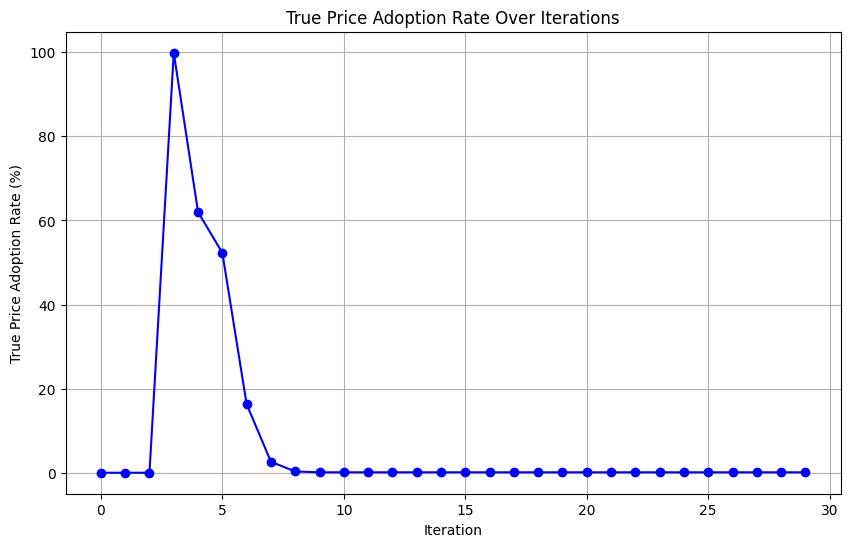

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(model_data['Adoption Rates'], marker='o', color='b')
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.grid(True)
plt.show()

In [ ]:

# Plot financial satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_F_Satisfaction'], label='Financial Satisfaction')
plt.plot(model_data['Avg_F_Uncertainty'], label='Financial Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Financial Satisfaction and Uncertainty Over Time')
plt.show()

# Plot social satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_S_Satisfaction'], label='Social Satisfaction')
plt.plot(model_data['Avg_S_Uncertainty'], label='Social Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Social Satisfaction and Uncertainty Over Time')
plt.show()

# Plot personal satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_P_Satisfaction'], label='Personal Satisfaction')
plt.plot(model_data['Avg_P_Uncertainty'], label='Personal Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Personal Satisfaction and Uncertainty Over Time')
plt.show()



How many agents choose each strategy per step:

      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1        711      259          30               0
2        900       91           9               0
3        902       92           6               0
4        738      139         123               0
5        475      398         127               0
6        262      703          35               0
7        105      890           5               0
8         20      979           1               0
9         17      983           0               0
10        16      984           0               0
11        16      984           0               0
12        16      984           0               0
13        16      984           0               0
14        16      984           0               0
15        16      984           0               0
16        16      984           0               0
17        16      984           0               0
18        16      984           0               0


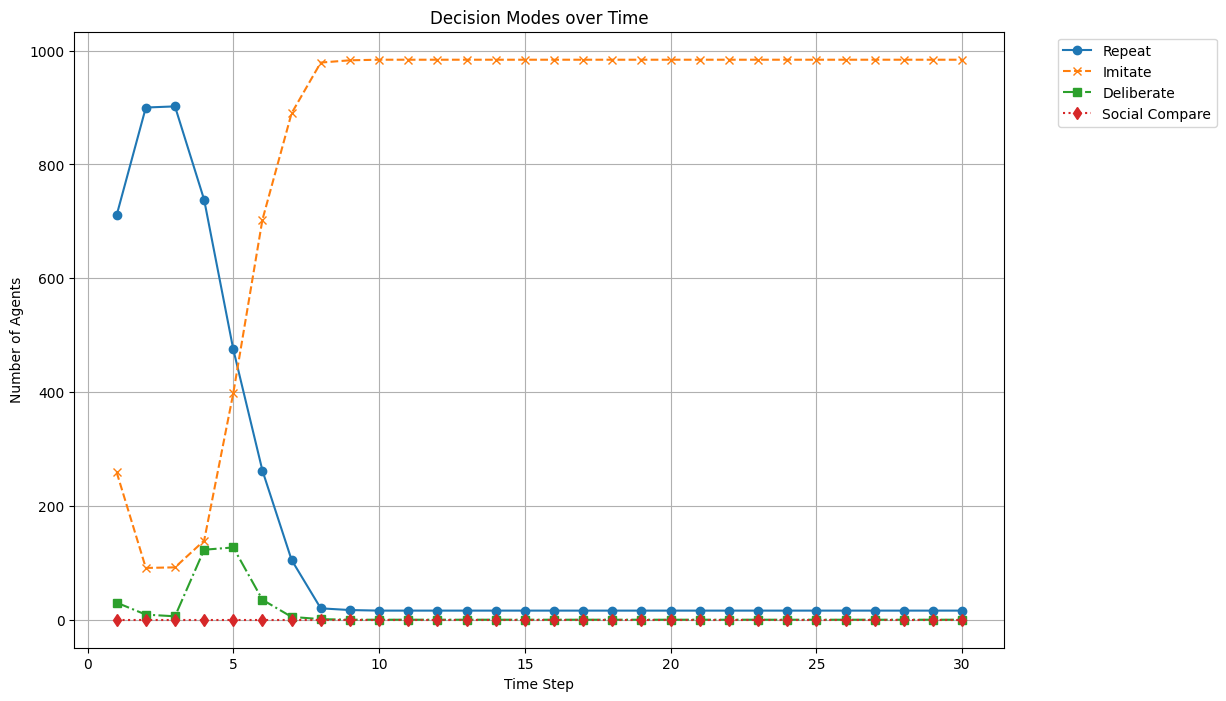

In [16]:
model_data = model.datacollector.get_agent_vars_dataframe()
decision_modes_count = model_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
print(decision_modes_count)

# Plot the decision modes count over time
plt.figure(figsize=(12, 8))
plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label='Repeat', linestyle='-', marker='o')
plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label='Imitate', linestyle='--', marker='x')
plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label='Deliberate', linestyle='-.', marker='s')
plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label='Social Compare', linestyle=':', marker='d')
plt.title('Decision Modes over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Distribution of agent attributes:

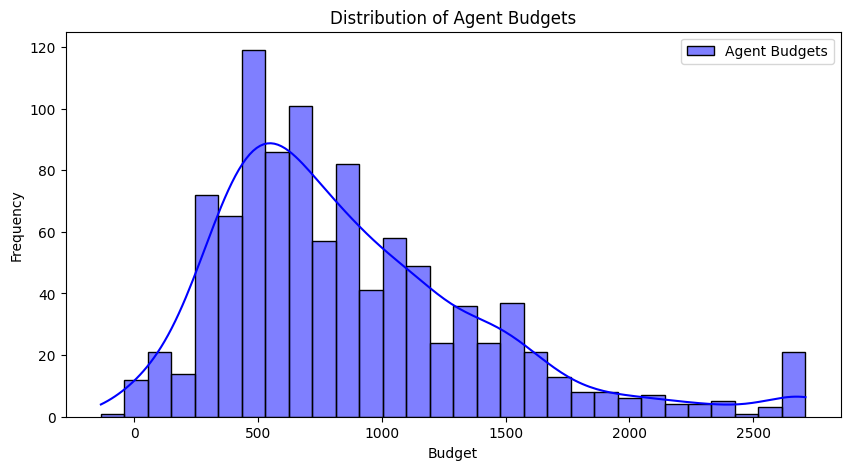

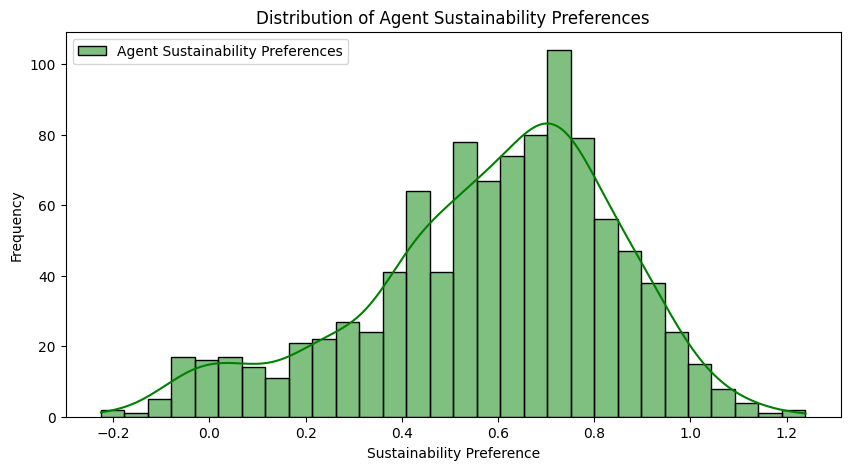

In [11]:
# Collect agent attributes
agent_budgets = [agent.budget for agent in model.agents]
agent_sustainability_preferences = [agent.preference_sustainability for agent in model.agents]

# Visualization code here
# Plot for Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_budgets, bins=30, kde=True, color='blue', label='Agent Budgets')
plt.title('Distribution of Agent Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot for Sustainability Preferences Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_sustainability_preferences, bins=30, kde=True, color='green', label='Agent Sustainability Preferences')
plt.title('Distribution of Agent Sustainability Preferences')
plt.xlabel('Sustainability Preference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Multiple runs of the same model:

Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: Runtime

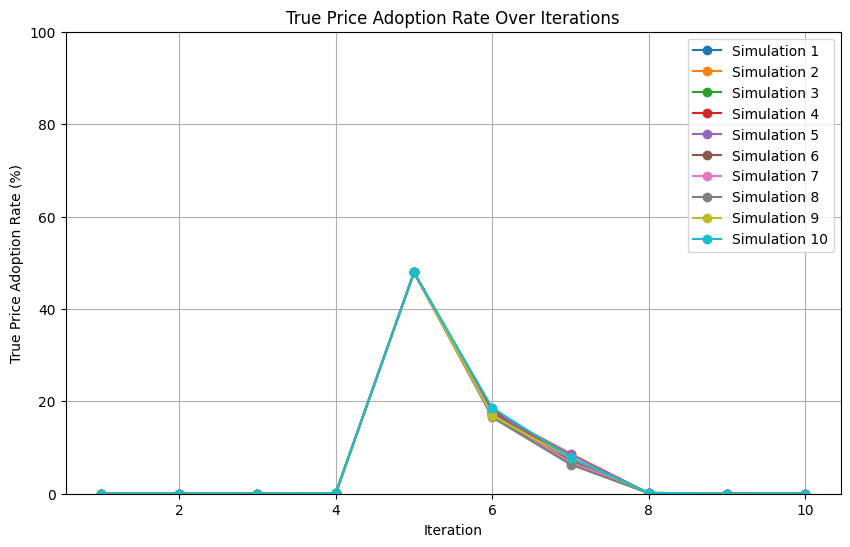

In [15]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}


# Number of simulations
num_simulations = 10

# Number of steps per simulation
num_steps = 10

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over the number of simulations
for simulation in range(num_simulations):
    # Initialize your model
    model = ConsumatModel(base_config)
    
    # Run the model for a specified number of steps and collect adoption rates
    adoption_rates = run_simulation(model, num_steps)
    
    # Plotting the results for the current simulation
    plt.plot(range(1, num_steps + 1), adoption_rates, marker='o', label=f'Simulation {simulation+1}')

# Finalizing the plot
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

### Vary True Price percentage

Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: Runtime

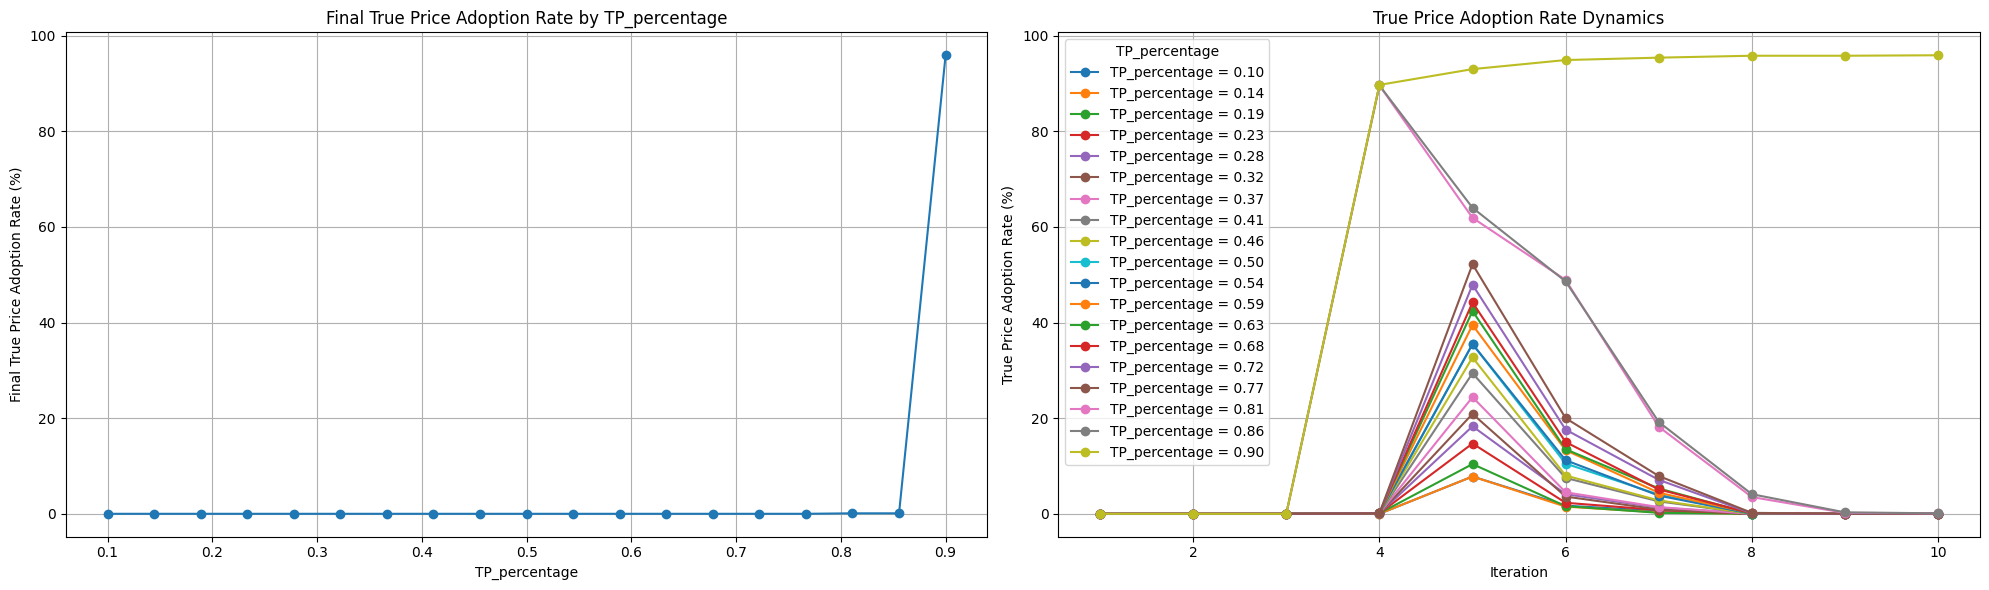

In [16]:
# Define TP percentages and simulation steps
tp_percentages = np.linspace(0.1, 0.9, 19)  # From 10% to 90%
num_steps = 10

# Prepare figure for plotting
plt.figure(figsize=(20, 6))

# Store final adoption rates and all adoption rates for plotting
final_adoption_rates = []
all_adoption_rates = []

# Run the simulation for each TP_percentage
for tp_percentage in tp_percentages:
    base_config['TP_percentage'] = tp_percentage
    model = ConsumatModel(base_config)
    model_data = run_simulation(model, num_steps)
    
    # Collect data for the plots
    final_adoption_rates.append(model_data['Adoption Rates'].iloc[-1])
    all_adoption_rates.append(model_data['Adoption Rates'].values)

# Plot 1: Final Adoption Rate by TP_percentage
plt.subplot(1, 2, 1)
plt.plot(tp_percentages, final_adoption_rates, marker='o')
plt.title('Final True Price Adoption Rate by TP_percentage')
plt.xlabel('TP_percentage')
plt.ylabel('Final True Price Adoption Rate (%)')
plt.grid(True)

# Plot 2: Adoption Rate Dynamics by TP_percentage
plt.subplot(1, 2, 2)
for i, rates in enumerate(all_adoption_rates):
    plt.plot(range(1, num_steps + 1), rates, label=f'TP_percentage = {tp_percentages[i]:.2f}', marker='o')

plt.title('True Price Adoption Rate Dynamics')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title='TP_percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

## Global Sensitivity Analysis

Sobol indices

Saltelli sampling


In [44]:


# Base configuration
base_config = {
    'TP_percentage': 0.8,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': '/Applications/UNI/Thesis/saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}

# Problem definition
problem = {
    'num_vars': 5,
    'names': ['TP_percentage',
              'product_price_low', 'product_price_high', 'min_increase_percentage',
              'max_increase_percentage'],
    'bounds': [
        [0.5, 1],   # TP_percentage
        [4, 6],     # product_price_low
        [9, 11],    # product_price_high
        [2, 6],     # min_increase_percentage
        [8, 12],    # max_increase_percentage
    ]
}

# Function to run the simulation
def run_simulation(params, num_steps=10):
    config = base_config.copy()
    config.update({
        'TP_percentage': params[0],
        'product_price_range': (params[1], params[2]),
        'min_increase_percentage': params[3],
        'max_increase_percentage': params[4]
    })
    
    np.random.seed(config['seed'])
    random.seed(config['seed'])
    model = ConsumatModel(config)
    
    for _ in range(num_steps):
        model.step()
    
    model_data = model.datacollector.get_model_vars_dataframe()
    final_adoption_rate = model_data['True_Price_Adoption_Rate'].iloc[-1]
    avg_satisfaction = model_data['Average_Satisfaction'].iloc[-1]
    avg_choice_changes = model_data['Average_Choice_Changes'].iloc[-1]
    avg_decision_mode_changes = model_data['Average_Decision_Mode_Changes'].iloc[-1]
    
    return final_adoption_rate, avg_satisfaction, avg_choice_changes, avg_decision_mode_changes

# Sensitivity analysis function
def run_sensitivity_analysis(base_config, problem, num_steps=10, seed=42):
    np.random.seed(seed)
    random.seed(seed)
    param_values = sobol_sample.sample(problem, 16, calc_second_order=True)
    
    Y_adoption = []
    Y_satisfaction = []
    Y_choice_changes = []
    Y_decision_mode_changes = []

    for params in tqdm(param_values, desc='Running Simulations'):
        adoption_rate, avg_satisfaction, avg_choice_changes, avg_decision_mode_changes = run_simulation(params, num_steps)
        Y_adoption.append(adoption_rate)
        Y_satisfaction.append(avg_satisfaction)
        Y_choice_changes.append(avg_choice_changes)
        Y_decision_mode_changes.append(avg_decision_mode_changes)

    Y_adoption = np.array(Y_adoption)
    Y_satisfaction = np.array(Y_satisfaction)
    Y_choice_changes = np.array(Y_choice_changes)
    Y_decision_mode_changes = np.array(Y_decision_mode_changes)

    Si_adoption = sobol_analyze.analyze(problem, Y_adoption, seed=seed)
    Si_satisfaction = sobol_analyze.analyze(problem, Y_satisfaction, seed=seed)
    Si_choice_changes = sobol_analyze.analyze(problem, Y_choice_changes, seed=seed)
 


# Run sensitivity analysis
Si_adoption, Si_satisfaction, Si_choice_changes, Si_decision_mode_changes = run_sensitivity_analysis(base_config, problem)
print("First order Sobol indices for Adoption Rate:", Si_adoption['S1'])
print("Total order Sobol indices for Adoption Rate:", Si_adoption['ST'])
print("First order Sobol indices for Satisfaction:", Si_satisfaction['S1'])
print("Total order Sobol indices for Satisfaction:", Si_satisfaction['ST'])
print("First order Sobol indices for Choice Changes:", Si_choice_changes['S1'])
print("Total order Sobol indices for Choice Changes:", Si_choice_changes['ST'])
print("First order Sobol indices for Decision Mode Changes:", Si_decision_mode_changes['S1'])
print("Total order Sobol indices for Decision Mode Changes:", Si_decision_mode_changes['ST'])


Running Simulations:   0%|          | 0/192 [00:00<?, ?it/s]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Running Simulations:   1%|          | 1/192 [00:05<16:40,  5.24s/it]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Running Simulations:   1%|          | 2/192 [00:10<16:25,  5.19s/it]/Applications/UNI/Thesis/Heterogeneous - no nework/model_heterogeneous.py:120: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Running Simulations:   2%|▏         | 3/192 [00:15<16:18,  5.18s/it]/Applications/UNI/Thesis/Heterogeneous - no nework/model_h

TypeError: cannot unpack non-iterable NoneType object

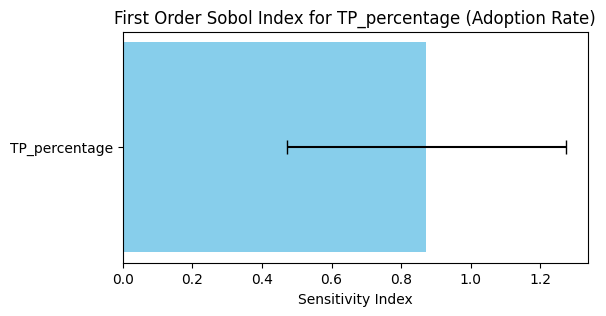

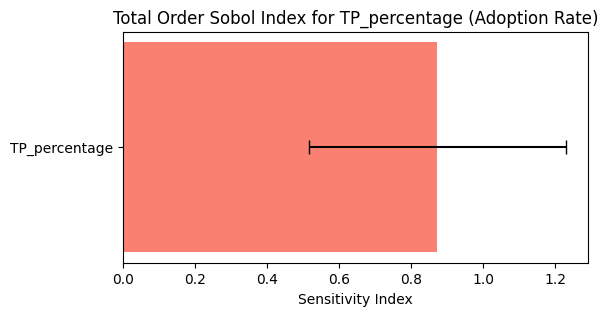

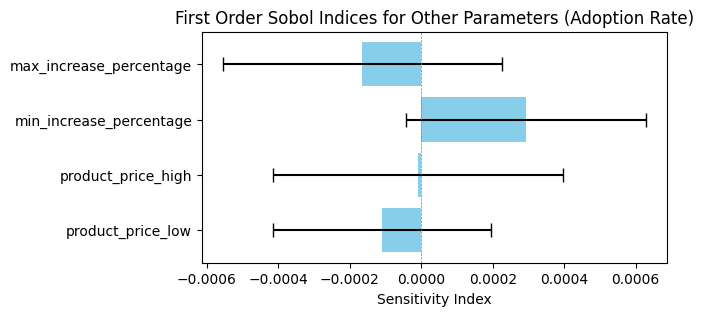

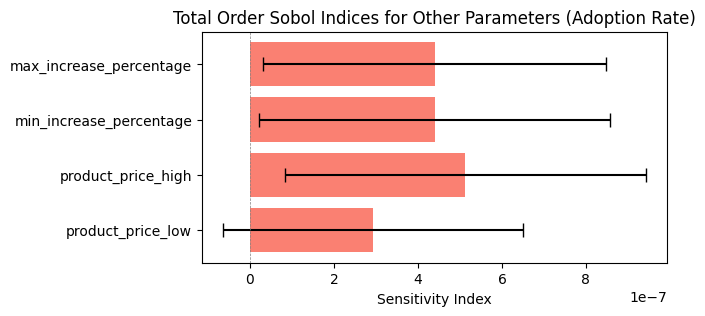

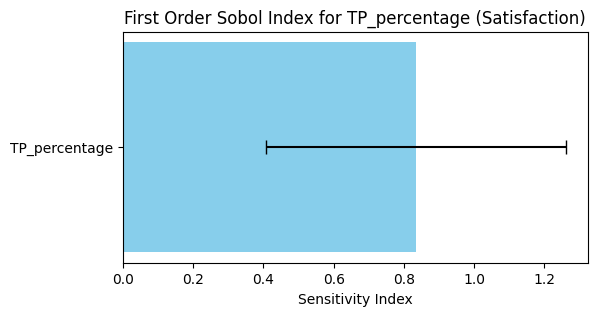

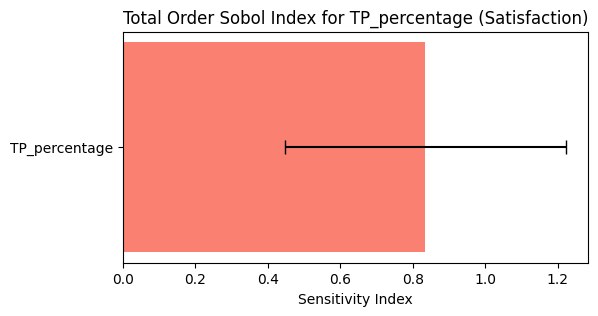

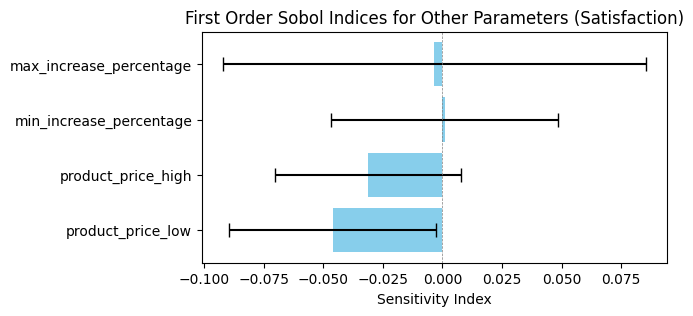

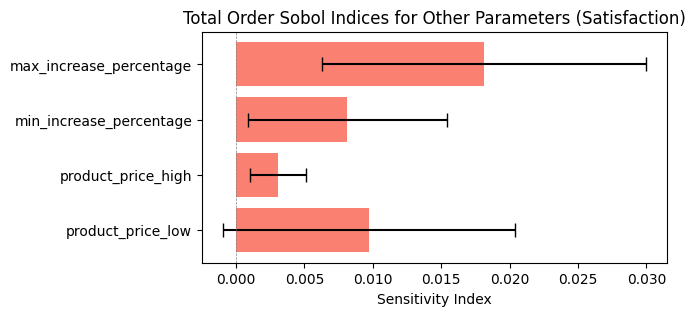

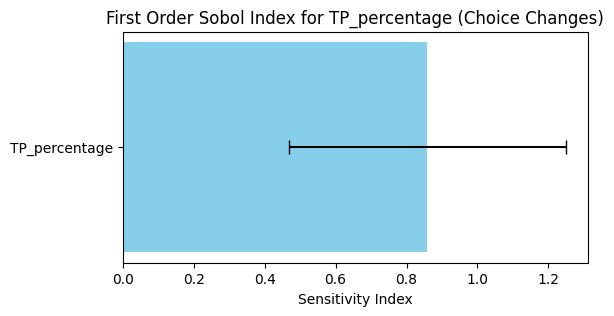

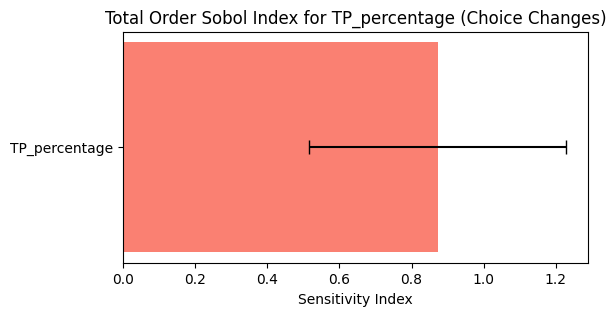

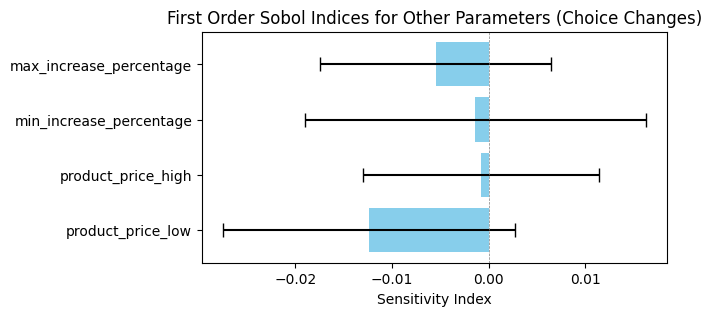

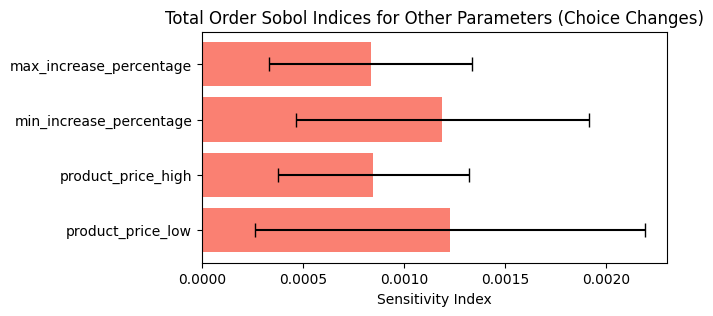

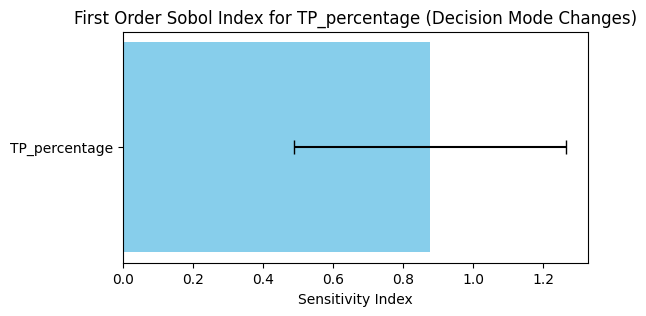

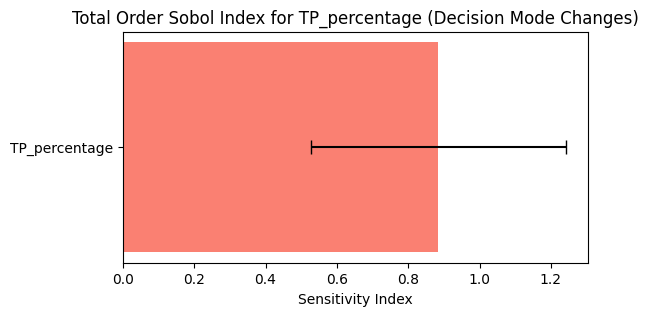

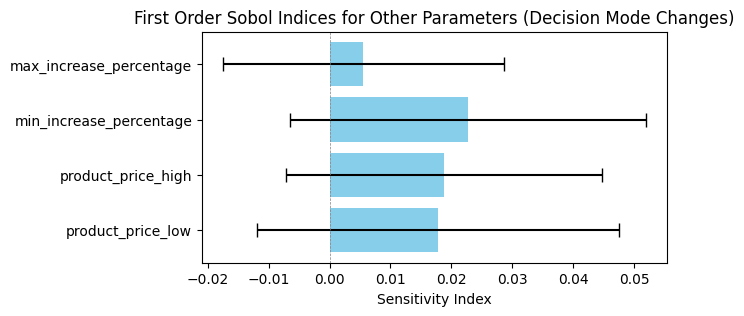

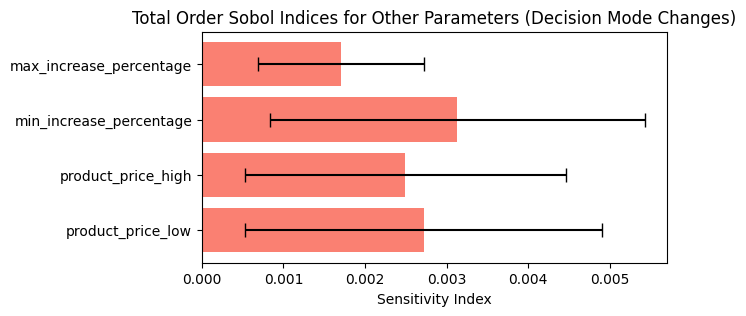

In [33]:


# List of parameter names
param_names = ['TP_percentage', 'product_price_low', 'product_price_high', 'min_increase_percentage', 'max_increase_percentage']

# Define the Sobol indices from the sensitivity analysis
sobol_results = {
    'Adoption Rate': Si_adoption,
    'Satisfaction': Si_satisfaction,
    'Choice Changes': Si_choice_changes,
    'Decision Mode Changes': Si_decision_mode_changes
}

# Function to plot Sobol indices separately for TP_percentage and other parameters
def plot_sobol_indices(results, metric_name):
    Si = results[metric_name]
    
    # Plot for TP_percentage
    plt.figure(figsize=(6, 3))
    plt.barh(['TP_percentage'], Si['S1'][0], xerr=Si['S1_conf'][0], align='center', color='skyblue', ecolor='black', capsize=5)
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
    plt.title(f'First Order Sobol Index for TP_percentage ({metric_name})')
    plt.xlabel('Sensitivity Index')
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.barh(['TP_percentage'], Si['ST'][0], xerr=Si['ST_conf'][0], align='center', color='salmon', ecolor='black', capsize=5)
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
    plt.title(f'Total Order Sobol Index for TP_percentage ({metric_name})')
    plt.xlabel('Sensitivity Index')
    plt.show()

    # Plot for other parameters
    plt.figure(figsize=(6, 3))
    plt.barh(param_names[1:], Si['S1'][1:], xerr=Si['S1_conf'][1:], align='center', color='skyblue', ecolor='black', capsize=5)
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
    plt.title(f'First Order Sobol Indices for Other Parameters ({metric_name})')
    plt.xlabel('Sensitivity Index')
    plt.show()

    plt.figure(figsize=(6, 3))
    plt.barh(param_names[1:], Si['ST'][1:], xerr=Si['ST_conf'][1:], align='center', color='salmon', ecolor='black', capsize=5)
    plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
    plt.title(f'Total Order Sobol Indices for Other Parameters ({metric_name})')
    plt.xlabel('Sensitivity Index')
    plt.show()

# Plotting Sobol indices for each metric
for metric in sobol_results:
    plot_sobol_indices(sobol_results, metric)
